11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


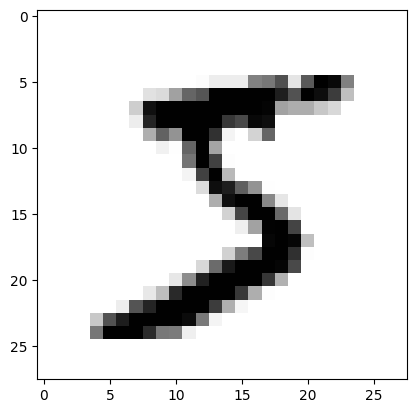

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

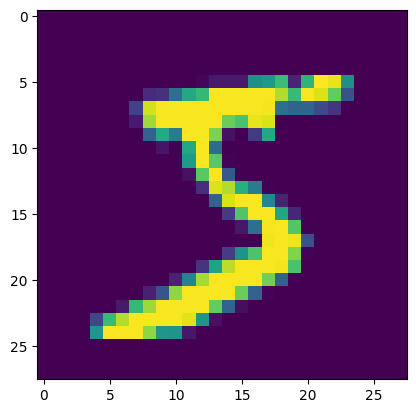

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
plt.imshow(x_train[0])
print(x_train[0])


In [ ]:
# ============================================================
# 0. CÀI ĐẶT & IMPORT
# ============================================================
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


# Load và chuẩn hoá dữ liệu

In [ ]:
# ============================================================
# 1. LOAD DỮ LIỆU & CHUẨN HOÁ
# ============================================================
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape từ (28,28) -> (784,) và scale về [0,1]
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 784).astype("float32") / 255.0

# One-hot cho nhãn
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


# Code gốc (ReLU + Softmax)

In [ ]:
# ============================================================
# 2. BASELINE MODEL
# ============================================================
model_base = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model_base.compile(optimizer=Adam(0.001),
                   loss=CategoricalCrossentropy(),
                   metrics=['accuracy'])

hist_base = model_base.fit(X_train, y_train,
                           batch_size=128, epochs=10,
                           validation_split=0.1, verbose=2)

# Đánh giá
y_pred = model_base.predict(X_test)
acc_base = accuracy_score(np.argmax(y_test,1), np.argmax(y_pred,1))
print("Baseline Accuracy: %.2f%%" % (acc_base*100))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 3s - 7ms/step - accuracy: 0.8947 - loss: 0.3787 - val_accuracy: 0.9540 - val_loss: 0.1751
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.9480 - loss: 0.1826 - val_accuracy: 0.9648 - val_loss: 0.1280
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9623 - loss: 0.1300 - val_accuracy: 0.9698 - val_loss: 0.1067
Epoch 4/10
422/422 - 3s - 6ms/step - accuracy: 0.9718 - loss: 0.0999 - val_accuracy: 0.9733 - val_loss: 0.0955
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9767 - loss: 0.0809 - val_accuracy: 0.9772 - val_loss: 0.0870
Epoch 6/10
422/422 - 2s - 6ms/step - accuracy: 0.9808 - loss: 0.0667 - val_accuracy: 0.9787 - val_loss: 0.0829
Epoch 7/10
422/422 - 4s - 10ms/step - accuracy: 0.9841 - loss: 0.0557 - val_accuracy: 0.9785 - val_loss: 0.0790
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9865 - loss: 0.0472 - val_accuracy: 0.9797 - val_loss: 0.0764
Epoch 9/10
422/422 - 5s - 12ms/step - accuracy: 0.9888 - loss: 0.0398 - val_accuracy: 0.9773 - val_loss: 0.0780

# Bài 1 – Sigmoid toàn bộ

In [ ]:
# ============================================================
# 3. BÀI 1 – Sigmoid cho cả 2 lớp
# ============================================================
model_b1 = Sequential([
    Dense(128, activation='sigmoid', input_shape=(784,)),
    Dense(10, activation='sigmoid')
])

model_b1.compile(optimizer=Adam(0.001),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

hist_b1 = model_b1.fit(X_train, y_train,
                       batch_size=128, epochs=10,
                       validation_split=0.1, verbose=2)

y_pred_b1 = model_b1.predict(X_test)
acc_b1 = accuracy_score(np.argmax(y_test,1), np.argmax(y_pred_b1,1))
print("Bài 1 Accuracy (sigmoid-sigmoid): %.2f%%" % (acc_b1*100))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.8541 - loss: 0.6192 - val_accuracy: 0.9285 - val_loss: 0.2767
Epoch 2/10
422/422 - 4s - 10ms/step - accuracy: 0.9188 - loss: 0.2888 - val_accuracy: 0.9408 - val_loss: 0.2123
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9345 - loss: 0.2315 - val_accuracy: 0.9542 - val_loss: 0.1726
Epoch 4/10
422/422 - 3s - 6ms/step - accuracy: 0.9435 - loss: 0.1953 - val_accuracy: 0.9627 - val_loss: 0.1490
Epoch 5/10
422/422 - 4s - 8ms/step - accuracy: 0.9520 - loss: 0.1682 - val_accuracy: 0.9645 - val_loss: 0.1339
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9579 - loss: 0.1471 - val_accuracy: 0.9683 - val_loss: 0.1223
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9632 - loss: 0.1300 - val_accuracy: 0.9687 - val_loss: 0.1151
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9670 - loss: 0.1158 - val_accuracy: 0.9708 - val_loss: 0.1077
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9709 - loss: 0.1039 - val_accuracy: 0.9730 - val_loss: 0.0984

sau khi làm bài 1 thì ta thấy accuracy thấy hơn ban đầu

#Bài 2 – ReLU ẩn, Sigmoid đầu ra

In [ ]:
# ============================================================
# 4. BÀI 2 – ReLU + Sigmoid
# ============================================================

X_train_new = X_train/255.0
X_test_new = X_test/255.0

model_b2 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='sigmoid')
])

model_b2.compile(optimizer=Adam(0.001),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

hist_b2 = model_b2.fit(X_train, y_train,
                       batch_size=128, epochs=10,
                       validation_split=0.1, verbose=2)

y_pred_b2 = model_b2.predict(X_test)
acc_b2 = accuracy_score(np.argmax(y_test,1), np.argmax(y_pred_b2,1))
print("Bài 2 Accuracy (relu-sigmoid): %.2f%%" % (acc_b2*100))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 3s - 7ms/step - accuracy: 0.8962 - loss: 0.3764 - val_accuracy: 0.9538 - val_loss: 0.1707
Epoch 2/10
422/422 - 3s - 7ms/step - accuracy: 0.9499 - loss: 0.1761 - val_accuracy: 0.9657 - val_loss: 0.1236
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9635 - loss: 0.1273 - val_accuracy: 0.9690 - val_loss: 0.1115
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9723 - loss: 0.0982 - val_accuracy: 0.9738 - val_loss: 0.0906
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.9769 - loss: 0.0795 - val_accuracy: 0.9755 - val_loss: 0.0841
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9809 - loss: 0.0658 - val_accuracy: 0.9773 - val_loss: 0.0819
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9846 - loss: 0.0553 - val_accuracy: 0.9777 - val_loss: 0.0774
Epoch 8/10
422/422 - 3s - 6ms/step - accuracy: 0.9867 - loss: 0.0466 - val_accuracy: 0.9783 - val_loss: 0.0769
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9890 - loss: 0.0400 - val_accuracy: 0.9787 - val_loss: 0.0751
E

# Bài 3 – Normalizing lại và chạy model bài 2

In [ ]:
# ============================================================
# 5. BÀI 3 – Chuẩn hoá lại và train model Bài 2
# ============================================================
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()
X_train_new = X_train_raw.reshape(-1, 784).astype("float32") / 255.0
X_test_new  = X_test_raw.reshape(-1, 784).astype("float32") / 255.0
y_train_new = to_categorical(y_train_raw, 10)
y_test_new  = to_categorical(y_test_raw, 10)

model_b3 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='sigmoid')
])
model_b3.compile(optimizer=Adam(0.001),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

hist_b3 = model_b3.fit(X_train_new, y_train_new,
                       batch_size=128, epochs=10,
                       validation_split=0.1, verbose=2)

y_pred_b3 = model_b3.predict(X_test_new)
acc_b3 = accuracy_score(np.argmax(y_test_new,1), np.argmax(y_pred_b3,1))
print("Bài 3 Accuracy (relu-sigmoid, data re-normalized): %.2f%%" % (acc_b3*100))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 3s - 8ms/step - accuracy: 0.8956 - loss: 0.3806 - val_accuracy: 0.9537 - val_loss: 0.1705
Epoch 2/10
422/422 - 2s - 6ms/step - accuracy: 0.9493 - loss: 0.1772 - val_accuracy: 0.9653 - val_loss: 0.1254
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9638 - loss: 0.1279 - val_accuracy: 0.9705 - val_loss: 0.1026
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9713 - loss: 0.0990 - val_accuracy: 0.9728 - val_loss: 0.0921
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9766 - loss: 0.0795 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9812 - loss: 0.0667 - val_accuracy: 0.9767 - val_loss: 0.0811
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9842 - loss: 0.0562 - val_accuracy: 0.9775 - val_loss: 0.0794
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9869 - loss: 0.0471 - val_accuracy: 0.9777 - val_loss: 0.0764
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9890 - loss: 0.0401 - val_accuracy: 0.9792 - val_loss: 0.0724
E

#Bài 4 – Ma trận nhầm lẫn của Bài 3



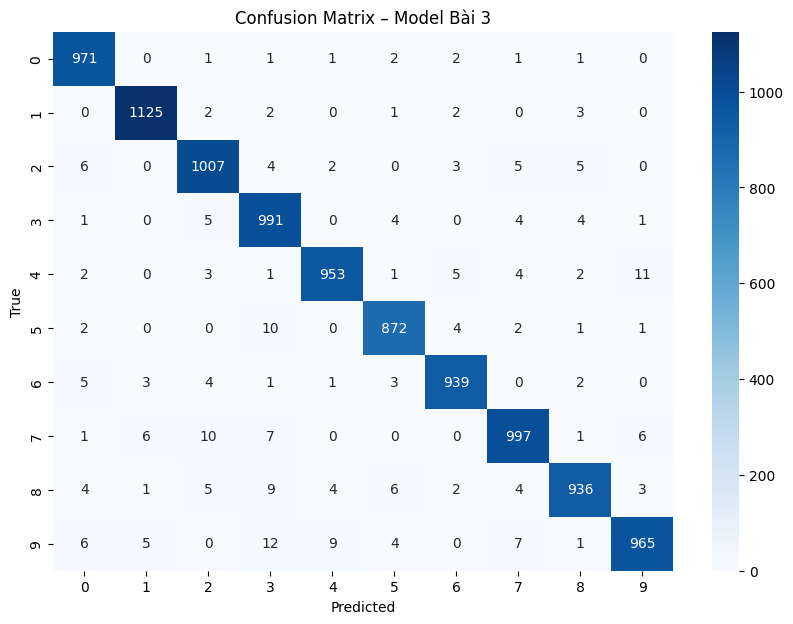

In [ ]:
# ============================================================
# 6. BÀI 4 – Confusion Matrix
# ============================================================
cm = confusion_matrix(np.argmax(y_test_new,1),
                      np.argmax(y_pred_b3,1))

df_cm = pd.DataFrame(cm,
                     index=[i for i in range(10)],
                     columns=[i for i in range(10)])
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Model Bài 3")
plt.show()


# Code Bài 5 – CIFAR-10, 2 lớp Dense

In [ ]:
# ============================================================
# BÀI 5 – Mô hình 2 lớp cho CIFAR-10
# ============================================================
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Load dữ liệu
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()

# 2. Chuẩn hoá: đưa pixel về [0,1]
X_train_cifar = X_train_cifar.reshape(-1, 32*32*3).astype("float32") / 255.0
X_test_cifar  = X_test_cifar.reshape(-1, 32*32*3).astype("float32") / 255.0

# 3. One-hot cho nhãn
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar  = to_categorical(y_test_cifar, 10)

print("Train shape:", X_train_cifar.shape)
print("Test  shape:", X_test_cifar.shape)

# 4. Mô hình 2 lớp Dense
model_cifar = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(10, activation='softmax')
])

model_cifar.compile(optimizer=Adam(learning_rate=0.001),
                    loss=CategoricalCrossentropy(),
                    metrics=['accuracy'])

# 5. Huấn luyện
hist_cifar = model_cifar.fit(X_train_cifar, y_train_cifar,
                             batch_size=128, epochs=10,
                             validation_split=0.1, verbose=2)

# 6. Đánh giá
y_pred_cifar = model_cifar.predict(X_test_cifar)
acc_cifar = accuracy_score(np.argmax(y_test_cifar,1),
                           np.argmax(y_pred_cifar,1))
print("CIFAR-10 Accuracy (Dense 2 lớp): %.2f%%" % (acc_cifar*100))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train shape: (50000, 3072)
Test  shape: (10000, 3072)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
352/352 - 10s - 29ms/step - accuracy: 0.3034 - loss: 1.9669 - val_accuracy: 0.3536 - val_loss: 1.8177
Epoch 2/10
352/352 - 7s - 18ms/step - accuracy: 0.3769 - loss: 1.7586 - val_accuracy: 0.3798 - val_loss: 1.7493
Epoch 3/10
352/352 - 6s - 18ms/step - accuracy: 0.3996 - loss: 1.6921 - val_accuracy: 0.4112 - val_loss: 1.6978
Epoch 4/10
352/352 - 5s - 15ms/step - accuracy: 0.4200 - loss: 1.6379 - val_accuracy: 0.4300 - val_loss: 1.6293
Epoch 5/10
352/352 - 11s - 31ms/step - accuracy: 0.4302 - loss: 1.6077 - val_accuracy: 0.4372 - val_loss: 1.6089
Epoch 6/10
352/352 - 10s - 29ms/step - accuracy: 0.4415 - loss: 1.5853 - val_accuracy: 0.4306 - val_loss: 1.6193
Epoch 7/10
352/352 - 10s - 28ms/step - accuracy: 0.4502 - loss: 1.5643 - val_accuracy: 0.4090 - val_loss: 1.6530
Epoch 8/10
352/352 - 6s - 16ms/step - accuracy: 0.4549 - loss: 1.5438 - val_accuracy: 0.4490 - val_loss: 1.5662
Epoch 9/10
352/352 - 5s - 15ms/step - accuracy: 0.4643 - loss: 1.5226 - val_accuracy: 0.4450 - val_l

# So sánh nhanh

In [ ]:
print("==== Accuracy Summary ====")
print("Baseline (relu-softmax):", acc_base*100)
print("Bài 1  (sigmoid-sigmoid):", acc_b1*100)
print("Bài 2  (relu-sigmoid):",   acc_b2*100)
print("Bài 3  (relu-sigmoid re-norm):", acc_b3*100)
print(f"CIFAR10 Dense 2 lớp:            {acc_cifar*100:.2f}%")

==== Accuracy Summary ====
Baseline (relu-softmax): 97.85000000000001
Bài 1  (sigmoid-sigmoid): 96.78999999999999
Bài 2  (relu-sigmoid): 97.66
Bài 3  (relu-sigmoid re-norm): 97.56
CIFAR10 Dense 2 lớp:            45.48%


| Dataset / Model                  | Đặc trưng dữ liệu                       | Độ khó | Kết quả điển hình  |
| -------------------------------- | --------------------------------------- | ------ | ------------------ |
| **MNIST** (ảnh chữ số xám 28×28) | Đơn giản, ít chi tiết, 1 kênh màu       | Dễ     | \~97% với Dense    |
| **CIFAR-10** (ảnh màu 32×32×3)   | 3 kênh màu, nhiều loại vật thể phức tạp | Khó    | \~40–50% với Dense |
Lý do CIFAR-10 khó hơn

Ảnh màu 3 kênh → đầu vào 3072 đặc trưng, nhiều thông tin nhiễu.

Nhiều hình dạng, bối cảnh: máy bay, chó, mèo… phức tạp hơn chữ số.

Model chỉ là 2 lớp fully-connected, không khai thác cấu trúc không gian (cạnh, góc) của ảnh.

Hàm ý

Với CIFAR-10, để đạt >70 % bạn nên dùng Convolutional Neural Network (CNN) hoặc data augmentation.

Kết quả thấp của model Dense chứng minh tầm quan trọng của kiến trúc phù hợp với dữ liệu.

✅ Tóm tắt

Chạy cell Bài 5 để huấn luyện CIFAR-10.

In bảng tổng kết để so sánh trực tiếp với kết quả các bài MNIST.

Quan sát: accuracy của CIFAR-10 thấp hơn nhiều → minh họa rõ ràng sự khác biệt giữa dữ liệu và kiến trúc mạng.